Not implemented

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
)
from ripple_heterogeneity.readout import downstream_information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
from matplotlib.ticker import AutoMinorLocator
import os
from statannotations.Annotator import Annotator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

region_df = pd.DataFrame()
for basepath in df.basepath:
    brainRegions = loading.load_brain_regions(basepath)
    temp_df = pd.DataFrame()
    temp_df["brainRegions"] = brainRegions.keys()
    temp_df["basepath"] = basepath
    region_df = pd.concat([region_df, temp_df], ignore_index=True)

sessions = region_df[region_df.brainRegions.str.contains("PFC|EC1|EC2|EC3|EC4|EC5|MEC")]
df_sessions = pd.DataFrame()
df_sessions["basepath"] = sessions.basepath.unique()
df_sessions

basepath
0        Z:\Data\AYAold\AYA7\day19
1        Z:\Data\AYAold\AYA7\day20
2        Z:\Data\AYAold\AYA7\day24
3        Z:\Data\AYAold\AYA7\day25
4        Z:\Data\AYAold\AYA7\day27
..                             ...
105  Z:\Data\FujisawaS\EE\EE0705fm
106  Z:\Data\FujisawaS\EE\EE0706fm
107  Z:\Data\FujisawaS\EE\EE0708fm
108             Z:\Data\HMC1\day12
109             Z:\Data\HMC1\day13

[110 rows x 1 columns]

In [316]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    add_new_deep_sup,
    compress_repeated_epochs,
)

basepath = r"Z:\Data\HMC1\day12"

putativeCellType="Pyr"  # type of cell to use for the analysis
brainRegions="CA1|PFC|EC1|EC2|EC3|EC4|EC5|MEC"  # brain regions to include

st, cm = loading.load_spikes(
    basepath, putativeCellType=putativeCellType, brainRegion=brainRegions
)
cm = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cm)


In [318]:
rip_exp_start=0.3  # ripple expansion start, in seconds, how much to expand ripples
rip_exp_stop=0.3
ripples_df = loading.load_ripples_events(basepath)
ripples = (
    nel.EpochArray(np.array([ripples_df.peaks, ripples_df.peaks]).T)
    .expand(rip_exp_start, direction="start")
    .expand(rip_exp_stop, direction="stop")
)

In [252]:
ripples

<EpochArray at 0x2442a59a700: 1,858 epochs> of length 15:35:060 minutes

In [253]:
ds = 0.01

In [236]:
bins = np.arange(st.first_event, st.last_event, ds)

In [244]:
ripple_mat = functions.get_participation(
    st.data,
    bins[0:-1:2],
    bins[1::2],
    par_type="firing_rate")

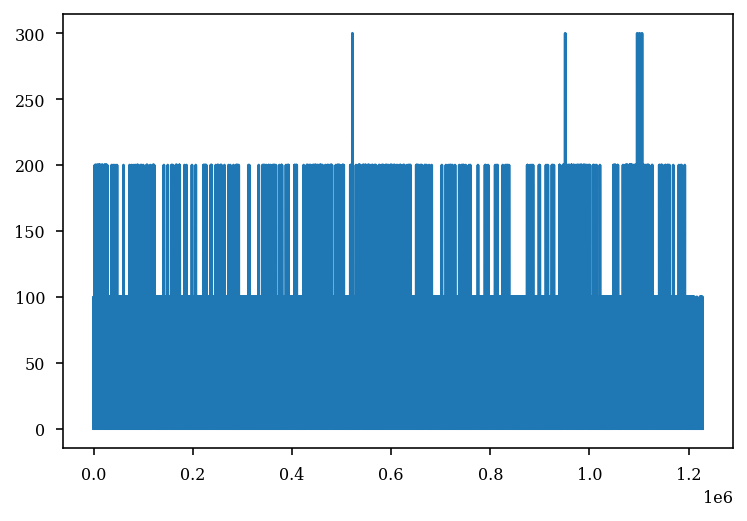

In [246]:
plt.plot(ripple_mat[0,:])

In [247]:
bst_test = st.bin(ds=ds)

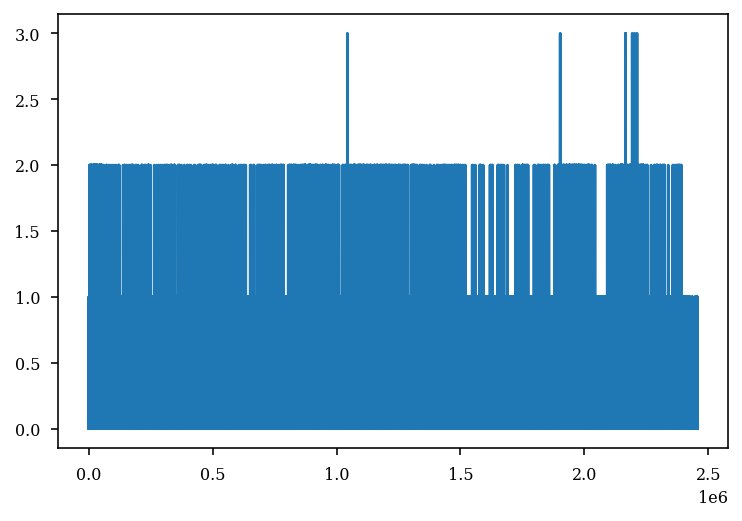

In [248]:
plt.plot(bst_test.data[0,:])


In [254]:
bst = st[ripples].bin(ds=ds)

<AxesSubplot:>

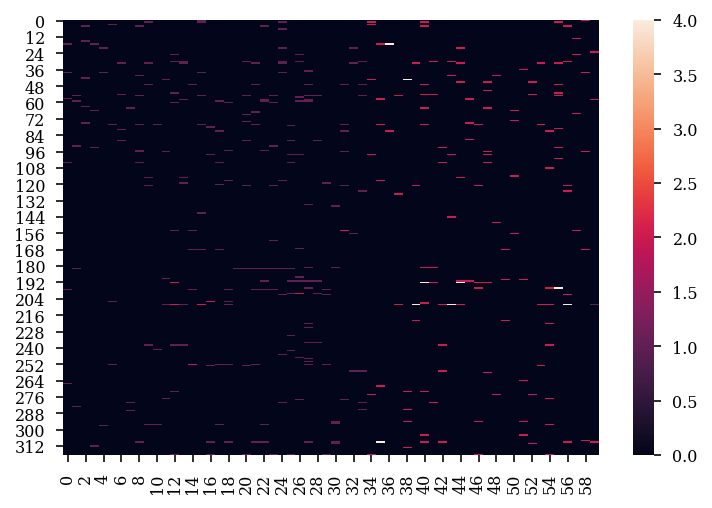

In [228]:
sns.heatmap(bst[0].data)

In [128]:
bst_shape = []
for bst_epoch in bst:
    bst_shape.append(bst_epoch.data[0, :].shape)

(7471, 60)

In [74]:
np.linspace(-rip_exp_start, rip_exp_stop, 61)

array([-0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22,
       -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13,
       -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04,
       -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,
        0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,
        0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,
        0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ])

In [118]:
ds = 0.01
np.arange(-.2,.2+ds,ds)

array([-2.00000000e-01, -1.90000000e-01, -1.80000000e-01, -1.70000000e-01,
       -1.60000000e-01, -1.50000000e-01, -1.40000000e-01, -1.30000000e-01,
       -1.20000000e-01, -1.10000000e-01, -1.00000000e-01, -9.00000000e-02,
       -8.00000000e-02, -7.00000000e-02, -6.00000000e-02, -5.00000000e-02,
       -4.00000000e-02, -3.00000000e-02, -2.00000000e-02, -1.00000000e-02,
        1.66533454e-16,  1.00000000e-02,  2.00000000e-02,  3.00000000e-02,
        4.00000000e-02,  5.00000000e-02,  6.00000000e-02,  7.00000000e-02,
        8.00000000e-02,  9.00000000e-02,  1.00000000e-01,  1.10000000e-01,
        1.20000000e-01,  1.30000000e-01,  1.40000000e-01,  1.50000000e-01,
        1.60000000e-01,  1.70000000e-01,  1.80000000e-01,  1.90000000e-01,
        2.00000000e-01])

In [109]:
# np.arange(-rip_exp_start, rip_exp_stop+ds, ds)
np.arange(0,.6,ds) - max(np.arange(0,.6,ds))/2

array([-0.295, -0.285, -0.275, -0.265, -0.255, -0.245, -0.235, -0.225,
       -0.215, -0.205, -0.195, -0.185, -0.175, -0.165, -0.155, -0.145,
       -0.135, -0.125, -0.115, -0.105, -0.095, -0.085, -0.075, -0.065,
       -0.055, -0.045, -0.035, -0.025, -0.015, -0.005,  0.005,  0.015,
        0.025,  0.035,  0.045,  0.055,  0.065,  0.075,  0.085,  0.095,
        0.105,  0.115,  0.125,  0.135,  0.145,  0.155,  0.165,  0.175,
        0.185,  0.195,  0.205,  0.215,  0.225,  0.235,  0.245,  0.255,
        0.265,  0.275,  0.285,  0.295])

In [57]:
np.where(cm.brainRegion.str.contains("CA1"))

(array([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
        187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
        200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
        213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255], dtype=int64),)

In [60]:
autocorrs = pd.DataFrame(index=times, columns=np.arange(len(spks)))

(59,)

In [105]:
for bst_epoch in bst:
    ts = bst_epoch.centers - bst_epoch.centers.min()
    ts = ts - ts.max() / 2
    if (max(ts) != 0.29) | (min(ts) != -0.29):
        print(ts)


[-0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295]
[-2.90000000e-01 -2.80000000e-01 -2.70000000e-01 -2.60000000e-01
 -2.50000000e-01 -2.40000000e-01 -2.30000000e-01 -2.20000000e-01
 -2.10000000e-01 -2.00000000e-01 -1.90000000e-01 -1.80000000e-01
 -1.70000000e-01 -1.60000000e-01 -1.50000000e-01 -1.40000000e-01
 -1.30000000e-01 -1.20000000e-01 -1.10000000e-01 -1.00000000e-01
 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02 -6.00000000e-02
 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02 -2.00000000e-02
 -1.00000000e-02  3.55271368e-15  1.00000000e-02  2.00000000e-02
  3.00000000e-02  4.00000000e-02  5.00000000e-02  6.0

In [65]:
ts = bst_epoch.centers - bst_epoch.centers.min()
ts - ts.max() / 2

array([-0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21,
       -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12,
       -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03,
       -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,
        0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,
        0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,
        0.25,  0.26,  0.27,  0.28,  0.29])

In [392]:
mi = mutualinfo.mutual_info([1,2,3], [4,5,6], local=True)
mi

array([1.5849625, 1.5849625, 1.5849625])

In [425]:
from itertools import combinations
from tqdm import tqdm
from numba import jit
from pyinform import mutualinfo
import multiprocessing
from joblib import Parallel, delayed

# @jit(nopython=True)
# def extract_mi(bst_ts,bst_data,bst_intervals,c,n_intervals,n_times):
#     mutual_infos = []
#     # X = np.zeros([n_intervals, n_times]).astype(float)
#     for s in c:
#         # iterate over epochs
#         for bst_epoch_i, bst_epoch in enumerate(bst_intervals):
#             x1 = bst_data[s[0],(bst_ts >= bst_epoch[0]) & (bst_ts <= bst_epoch[1])]
#             x2 = bst_data[s[1],(bst_ts >= bst_epoch[0]) & (bst_ts <= bst_epoch[1])]
#             # mi = mutualinfo.mutual_info(x1, x2, local=True)
#             # X[bst_epoch_i, : len(mi)] = mi

#         # collect mean over epochs
#         # mutual_infos.append(X.mean(axis=0))
#     return mutual_infos


def extract_mi(bst, s, bst_shape):
    X = np.zeros([bst.n_intervals, bst_shape]).astype(float)
    for bst_epoch_i, bst_epoch in enumerate(bst):
        mi = mutual_info(bst_epoch.data[s[0]], bst_epoch.data[s[1]], local=True)
        X[bst_epoch_i, : len(mi)] = mi

    # collect mean over epochs
    return X.mean(axis=0)


def pairwise_cross_corr(
    bst, cm, return_index=True, allowed_pairs=[("CA1", "MEC"), ("CA1", "PFC")]
):
    # Get unique combo without repeats
    x = np.arange(0, bst.data.shape[0])
    c = np.array(list(combinations(x, 2)))

    # refine to include cross region pairs
    c = c[cm.brainRegion.iloc[c[:, 0]].values != cm.brainRegion.iloc[c[:, 1]].values]

    # refine to only include allowed pairs
    keep_idx = []
    for pair in allowed_pairs:
        keep_idx.append(
            (cm.brainRegion.iloc[c[:, 0]].values == pair[0])
            & (cm.brainRegion.iloc[c[:, 1]].values == pair[1])
        )
        keep_idx.append(
            (cm.brainRegion.iloc[c[:, 0]].values == pair[1])
            & (cm.brainRegion.iloc[c[:, 1]].values == pair[0])
        )
    c = c[np.vstack(keep_idx).any(axis=0)]

    # locate n bins and time bounds
    bst_shape = []
    ts_all = []
    for bst_epoch in bst:
        bst_shape.append(bst_epoch.data[0, :].shape)
        ts = bst_epoch.centers - bst_epoch.centers.min()
        ts_all.append(ts - ts.max() / 2)

    # prepare a pandas dataframe to receive the data
    times = np.linspace(
        np.hstack(ts_all).min(), np.hstack(ts_all).max(), np.max(bst_shape)
    )
    mutual_infos = pd.DataFrame(index=times, columns=np.arange(len(c)))

    # Now we can iterate over each pair
    # mutual_infos = extract_mi(bst.centers,bst.data,bst.support.data,c.astype(int),bst.n_intervals,max(bst_shape)[0])
    # X = np.zeros([bst.n_intervals, max(bst_shape)[0]]).astype(float)

    # for i, s in tqdm(enumerate(c)):
    #     # iterate over epochs
    #     for bst_epoch_i, bst_epoch in enumerate(bst):
    #         mi = mutual_info(bst_epoch.data[s[0]], bst_epoch.data[s[1]], local=True)
    #         X[bst_epoch_i, : len(mi)] = mi

    #     # collect mean over epochs
    #     mutual_infos[i] = X.mean(axis=0)

    num_cores = multiprocessing.cpu_count()
    mutual_infos = Parallel(n_jobs=num_cores)(delayed(extract_mi)(bst, s, max(bst_shape)[0]) for s in c)

    # mutual_infos = [extract_mi(bst, s, max(bst_shape)[0]) for s in c]

    if return_index:
        return mutual_infos, c
    else:
        return mutual_infos


In [322]:
bst = st[ripples].bin(ds=ds)


In [ ]:
cm.loc[cm.brainRegion.str.contains("CA1"), "brainRegion"] = "CA1"
cm.loc[cm.brainRegion.str.contains("EC1|EC2|EC3|EC4|EC5|MEC"), "brainRegion"] = "MEC"

mutual_infos, pairs = pairwise_cross_corr(bst,cm)


In [332]:
cm.brainRegion.iloc[c[:,0]].values

array(['PFC', 'PFC', 'PFC', ..., 'CA1', 'CA1', 'CA1'], dtype=object)

In [341]:
allowed_pairs = [("CA1","MEC"),("CA1","PFC")]

keep_idx = []
for pair in allowed_pairs:
    keep_idx.append((cm.brainRegion.iloc[c[:,0]].values == pair[0]) & (cm.brainRegion.iloc[c[:,1]].values == pair[1]))
    keep_idx.append((cm.brainRegion.iloc[c[:,0]].values == pair[1]) & (cm.brainRegion.iloc[c[:,1]].values == pair[0]))
c = c[np.vstack(keep_idx).any(axis=0)]

In [344]:
cm.loc[cm.brainRegion.str.contains("CA1"), "brainRegion"] = "CA1"
cm.loc[cm.brainRegion.str.contains("EC1|EC2|EC3|EC4|EC5|MEC"), "brainRegion"] = "MEC"

x = np.arange(0, bst.data.shape[0])
c = np.array(list(combinations(x, 2)))

c = c[cm.brainRegion.iloc[c[:, 0]].values != cm.brainRegion.iloc[c[:, 1]].values]

allowed_pairs = [("CA1", "MEC"), ("CA1", "PFC")]

keep_idx = []
for pair in allowed_pairs:
    keep_idx.append(
        (cm.brainRegion.iloc[c[:, 0]].values == pair[0])
        & (cm.brainRegion.iloc[c[:, 1]].values == pair[1])
    )
    keep_idx.append(
        (cm.brainRegion.iloc[c[:, 0]].values == pair[1])
        & (cm.brainRegion.iloc[c[:, 1]].values == pair[0])
    )
c = c[np.vstack(keep_idx).any(axis=0)]
c.shape


(13857, 2)

In [350]:
temp_df = pd.DataFrame()
temp_df["ref_brainRegion"] = cm.brainRegion.iloc[c[:,0]].values
temp_df["target_brainRegion"] = cm.brainRegion.iloc[c[:,1]].values
temp_df["ref_brainRegion_idx"] = c[:,0]
temp_df["target_brainRegion_idx"] = c[:,1]
temp_df

ref_brainRegion target_brainRegion  ref_brainRegion_idx  \
0                 PFC                CA1                    0   
1                 PFC                CA1                    0   
2                 PFC                CA1                    0   
3                 PFC                CA1                    0   
4                 PFC                CA1                    0   
...               ...                ...                  ...   
13852             CA1                MEC                  179   
13853             CA1                MEC                  179   
13854             CA1                MEC                  179   
13855             CA1                MEC                  179   
13856             CA1                MEC                  179   

       target_brainRegion_idx  
0                          87  
1                          88  
2                          89  
3                          90  
4                          91  
...                       ...  
13852                     237  
13853                     238  
13854                     239  
13855                     240  
13856                     241  

[13857 rows x 4 columns]

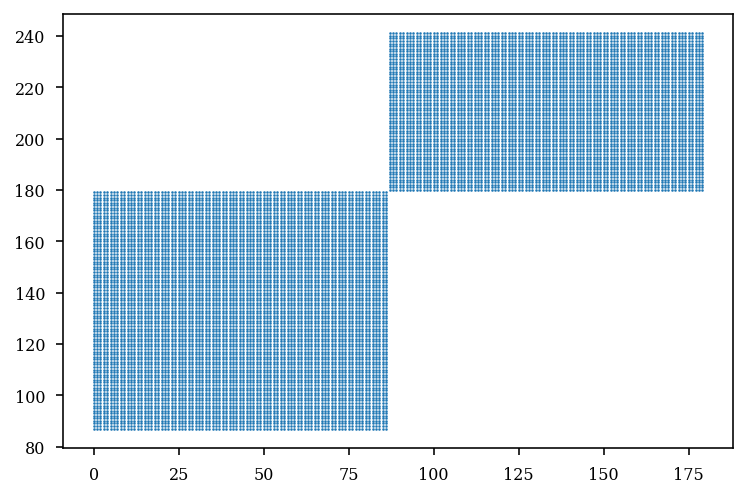

In [352]:
plt.scatter(temp_df.ref_brainRegion_idx, temp_df.target_brainRegion_idx,s=1)

<AxesSubplot:>

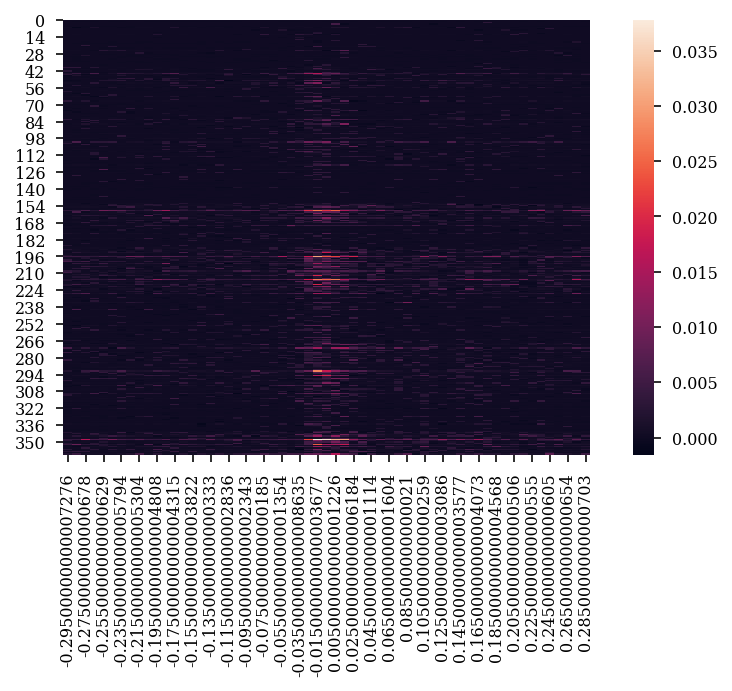

In [315]:
sns.heatmap(mutual_infos.T)

In [311]:
cm.loc[cm.brainRegion.str.contains("CA1"), "brainRegion"] = "CA1"
cm.brainRegion.value_counts()

CA1    19
MEC    19
Name: brainRegion, dtype: int64

In [309]:
cm["unique_pair_labels"] = cm.brainRegion
cm.loc[cm.brainRegion.str.contains("CA1"),"unique_pair_labels"] = cm[cm.brainRegion.str.contains("CA1")].deepSuperficial


In [310]:
cm["unique_pair_labels"]

44     Superficial
45     Superficial
46          middle
56          middle
57     Superficial
68     Superficial
69     Superficial
71            Deep
72            Deep
73            Deep
74            Deep
75          middle
76            Deep
77            Deep
78            Deep
80            Deep
81          middle
82          middle
85          middle
86             MEC
88             MEC
90             MEC
91             MEC
92             MEC
93             MEC
94             MEC
95             MEC
96             MEC
97             MEC
98             MEC
99             MEC
100            MEC
101            MEC
102            MEC
103            MEC
104            MEC
105            MEC
106            MEC
Name: unique_pair_labels, dtype: object

In [300]:
cm.brainRegion[cm.brainRegion.str.contains("CA1")].unique()[0]


'CA1'

In [299]:
dict([cm.brainRegion[cm.brainRegion.str.contains("CA1")].unique()[0],"CA1"])

results["animal_id"] = results.basepath.map(dict([(basepath, loading.get_animal_id(basepath)) for basepath in results.basepath.unique()]))


ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [301]:
x = np.arange(0, bst.data.shape[0])
c = np.array(list(combinations(x, 2)))
c = c[cm.brainRegion.iloc[c[:,0]].values != cm.brainRegion.iloc[c[:,1]].values]
c
# for i in range(len(brainRegion)):


array([[ 0, 19],
       [ 0, 20],
       [ 0, 21],
       [ 0, 22],
       [ 0, 23],
       [ 0, 24],
       [ 0, 25],
       [ 0, 26],
       [ 0, 27],
       [ 0, 28],
       [ 0, 29],
       [ 0, 30],
       [ 0, 31],
       [ 0, 32],
       [ 0, 33],
       [ 0, 34],
       [ 0, 35],
       [ 0, 36],
       [ 0, 37],
       [ 1, 19],
       [ 1, 20],
       [ 1, 21],
       [ 1, 22],
       [ 1, 23],
       [ 1, 24],
       [ 1, 25],
       [ 1, 26],
       [ 1, 27],
       [ 1, 28],
       [ 1, 29],
       [ 1, 30],
       [ 1, 31],
       [ 1, 32],
       [ 1, 33],
       [ 1, 34],
       [ 1, 35],
       [ 1, 36],
       [ 1, 37],
       [ 2, 19],
       [ 2, 20],
       [ 2, 21],
       [ 2, 22],
       [ 2, 23],
       [ 2, 24],
       [ 2, 25],
       [ 2, 26],
       [ 2, 27],
       [ 2, 28],
       [ 2, 29],
       [ 2, 30],
       [ 2, 31],
       [ 2, 32],
       [ 2, 33],
       [ 2, 34],
       [ 2, 35],
       [ 2, 36],
       [ 2, 37],
       [ 3, 19],
       [ 3, 20

In [275]:
from itertools import product
# product(cm.brainRegion.str.contains("CA1"))
x = cm.brainRegion
c = np.array(list(product(x, repeat=2)))
c

array([['CA1', 'CA1'],
       ['CA1', 'CA1'],
       ['CA1', 'CA1'],
       ...,
       ['MEC', 'MEC'],
       ['MEC', 'MEC'],
       ['MEC', 'MEC']], dtype='<U3')

In [276]:
c.shape

(1444, 2)

<AxesSubplot:>

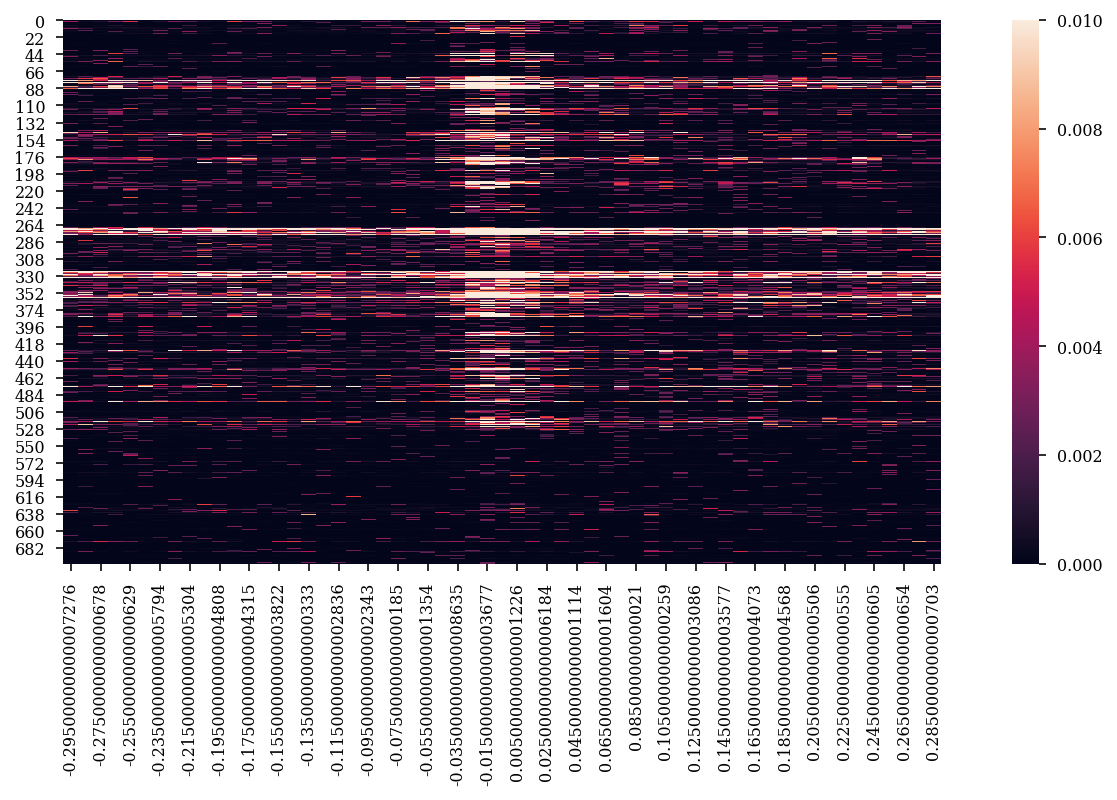

In [264]:
plt.figure(figsize=(10, 5))
sns.heatmap(mutual_infos.T,vmax=.01,vmin=0)

In [159]:
x = np.arange(0, bst.data.shape[0])
c = np.array(list(combinations(x, 2)))
for i, s in enumerate(c):
    # iterate over epochs
    mi = mutual_info(bst.data[s[0]], bst.data[s[1]], local=True)
    X[bst_epoch_i, : len(mi)] = mi
# c.shape

(50721, 2)

In [219]:
s = c[0,:]
mi = mutual_info(bst.data[s[0]], bst.data[s[1]], local=True)
mi

array([-7.47051623e-05, -7.47051623e-05, -7.47051623e-05, ...,
       -7.47051623e-05, -7.47051623e-05, -7.47051623e-05])

In [ ]:
mi_array = nel.AnalogSignalArray(data=mi,timestamps=bst.centers,support=bst.support)

bst_shape = []
ts_all = []
for bst_epoch in mi_array:
    bst_shape.append(bst_epoch.data[0, :].shape)
    ts = bst_epoch.abscissa_vals - bst_epoch.abscissa_vals.min()
    ts_all.append(ts - ts.max() / 2)

X = np.zeros([bst.n_intervals, max(bst_shape)[0]]) * np.nan

for mi_idx, mi in enumerate(mi_array):
    X[mi_idx, : len(mi.data[0])] = mi.data[0]


<AxesSubplot:>

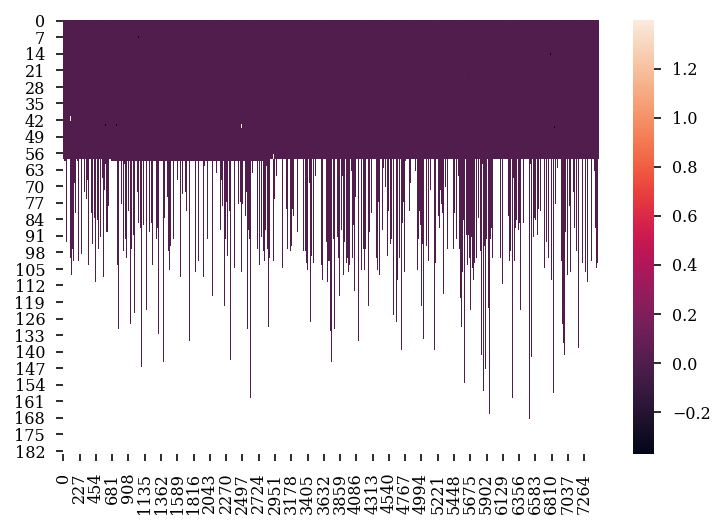

In [224]:
sns.heatmap(X.T)

In [ ]:
mutual_infos, pairs = pairwise_cross_corr(bst)

In [151]:
bst_shape = []
ts_all = []
for bst_epoch in bst:
    bst_shape.append(bst_epoch.data[0, :].shape)
    ts = bst_epoch.centers - bst_epoch.centers.min()
    ts_all.append(ts - ts.max() / 2)

In [154]:
np.hstack(ts_all).max()

np.linspace(np.hstack(ts_all).min(), np.hstack(ts_all).max(), np.max(bst_shape))

array([-0.295, -0.285, -0.275, -0.265, -0.255, -0.245, -0.235, -0.225,
       -0.215, -0.205, -0.195, -0.185, -0.175, -0.165, -0.155, -0.145,
       -0.135, -0.125, -0.115, -0.105, -0.095, -0.085, -0.075, -0.065,
       -0.055, -0.045, -0.035, -0.025, -0.015, -0.005,  0.005,  0.015,
        0.025,  0.035,  0.045,  0.055,  0.065,  0.075,  0.085,  0.095,
        0.105,  0.115,  0.125,  0.135,  0.145,  0.155,  0.165,  0.175,
        0.185,  0.195,  0.205,  0.215,  0.225,  0.235,  0.245,  0.255,
        0.265,  0.275,  0.285,  0.295])

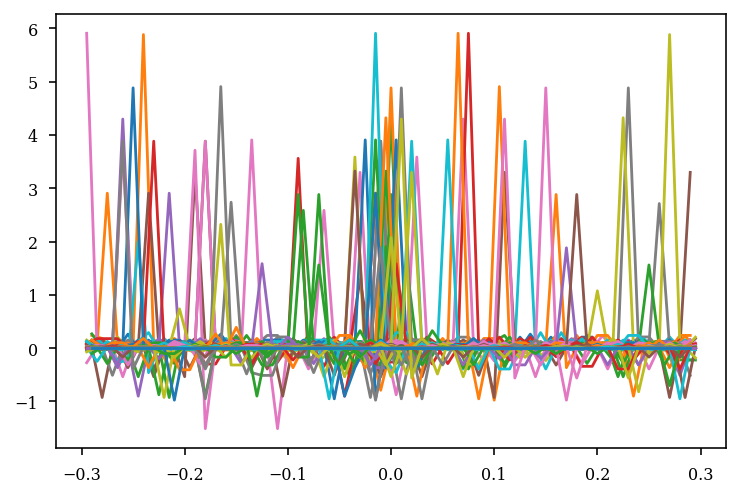

In [142]:
from pyinform import mutual_info

# mi = []
ts_all = []
X = np.zeros([bst.n_intervals, max(bst_shape)[0]])*np.nan

for bst_epoch_i, bst_epoch in enumerate(bst):
    ts = bst_epoch.centers - bst_epoch.centers.min()
    ts = ts - ts.max() / 2
    ts_all.append(ts)
    mi = mutual_info(bst_epoch.data[0, :], bst_epoch.data[135, :], local=True)
    X[bst_epoch_i,:len(mi)] = mi
    plt.plot(ts, mutual_info(bst_epoch.data[0, :], bst_epoch.data[135, :], local=True))

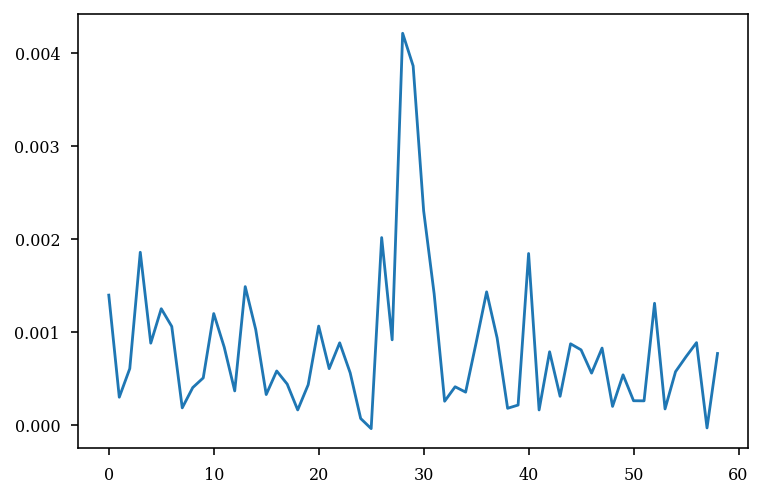

In [143]:
plt.plot(X.mean(axis=0))

<AxesSubplot:>

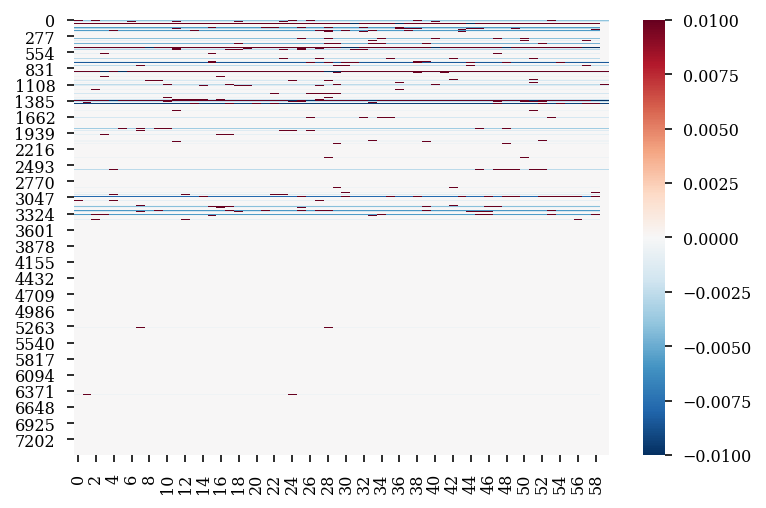

In [141]:
sns.heatmap(X, cmap="RdBu_r", vmin=-.01, vmax=.01)

In [123]:
ts_all,mi = np.hstack(ts_all),np.hstack(mi)

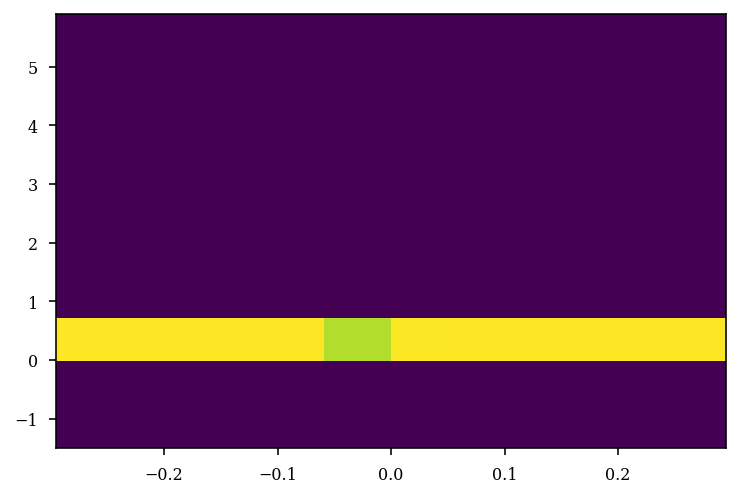

In [126]:
plt.hist2d(ts_all,mi)
plt.show()